I recently moved to the Pacific Northwest from Texas and I've noticed a few differences between the regions. The big one is all the WATER. There is so much water here! It falls from the sky everyday. It causes moss to grow on rooftops. And then there's the ocean, ahem, I mean the bay. 

Another difference I've noticed is in the industry. I live in Tacoma which has a fairly active port. There is more train and truck traffic than I experienced in Texas. All those goods need to be transported from the Port to points east and south. This got me thinking about what the industry and business scene is like in Tacoma. 

The city of Tacoma has a really nice [website](https://data.cityoftacoma.org/) devoted to its public data. You can download the data directly or use some of the tools provided by [Socrata](https://socrata.com/). I decided to take a look at [Tacoma's list of business licenses](https://data.cityoftacoma.org/Business/TACOMA-BUSINESS-LICENSE/29fz-3eiz). It was last updated April 17, 2017 and has over 32,000 rows of data. That means that over 32,000 [business licenses](https://www.cityoftacoma.org/government/city_departments/finance/tax_and_license/business_license_faqs) have been issued to businesses operating in Tacoma. These businesses include lessors that [rent or lease out their property](http://www.cityoftacoma.org/government/city_departments/finance/tax_and_license/rental_business_license/) in Tacoma, as well as drivers who [drive for a ride-share company like uber or lyft](http://www.cityoftacoma.org/government/city_departments/finance/tax_and_license/For_Hire_Transportation_Service__service_companies/).

I'm curious how Tacoma's industry landscape has changed over time. Let's take a look at the data.

In [1]:
# Load packages.
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt   
%matplotlib inline  

In [2]:
# Read data into pandas dataframe.
bl = pd.read_csv('TACOMA_BUSINESS_LICENSE.csv')

In [3]:
# How big is the dataset?
bl.shape

(32349, 13)

In [4]:
# View the dataset
bl.head()

,LICENSE NUMBER,BUSINESS NAME,OWNER NAME,HOUSE NUMBER AND STREET NAME,UNIT NUMBER,P.O. BOX,CITY,STATE,ZIP CODE,NAICS CODE,NAICS CODE DESCRIPTION,BUSINESS OPEN DATE,Location 1
0,500006886,CH2M HILL INC,CH2M HILL INC,1100 112TH AVE NE,500,NaN,BELLEVUE,WA,98004,541330.0,Engineering Services (ES 0200 0225 08),01/01/1994,"1100 112TH AVE NE\nBELLEVUE, WA 98004\n(47.620..."
1,500110805,MONARCH MUSIC & ENTERTAINMENT,MONARCH MUSIC & ENTERTAINMENT,3910 N 24TH ST,NaN,NaN,TACOMA,WA,98406,611610.0,Fine Arts Schools (ES 0200 0225 08),04/16/2016,"3910 N 24TH ST\nTACOMA, WA 98406\n(47.269197, ..."
2,500092547,MARY BAKER,CARL E BAKER,4501 ALAMEDA AVE,NaN,NaN,UNIVERSITY PLACE,WA,98466-6314,531110.0,Lessors of Residential Buildings and Dwellings,01/01/2007,"4501 ALAMEDA AVE\nUNIVERSITY PLACE, WA 98466-6..."
3,500115952,GAMETIME,PLAYCORE WISCONSIN INC,401 CHESTNUT ST,STE 410,NaN,CHATTANOOGA,TN,37402,451110.0,Sporting Goods Stores,12/01/2005,"401 CHESTNUT ST\nCHATTANOOGA, TN 37402\n(35.05..."
4,500091065,FRANK RICHMOND SECURITY,FRANK RICHMOND,3702 64TH AVENUE CT NW,NaN,NaN,GIG HARBOR,WA,98335-7236,561612.0,Security Guards and Patrol Services,02/06/2015,"3702 64TH AVENUE CT NW\nGIG HARBOR, WA 98335-7..."


Most of the columns are pretty self-explanatory. The `ZIP CODE` and `STATE` columns tell me where the owner of the business is located. Also the `BUSINESS OPEN DATE` might be useful too.  The columns labeled `NAICS CODE` and `NAICS CODE DESCRIPTION` give an idea of the industry of the business. NAICS (North American Industry Classification System) codes are like the [Dewey Decimal System](https://en.wikipedia.org/wiki/Dewey_Decimal_Classification) numbers that you can see marked on library books. 

For NAICS codes, the longer the number the more precise the classification. For example, if a business is classified as part of business sector `61`, then it provides educational services. However, it is classified as `611512`, then it is a flight training school. 

Here's a listing of the description of the first two digits of the NAICS code.

There are about 20 generally defined sectors of business. It would interesting to see how these sectors have changed in Tacoma over time using the `BUSINESS OPEN DATE` to track that. 

However, before I get ahead of myself, let me clean the data up a bit.

In [5]:
# Check the data types
bl.dtypes

LICENSE NUMBER                    int64
BUSINESS NAME                    object
OWNER NAME                       object
HOUSE NUMBER AND STREET NAME     object
UNIT NUMBER                      object
P.O. BOX                        float64
CITY                             object
STATE                            object
ZIP CODE                         object
NAICS CODE                      float64
NAICS CODE DESCRIPTION           object
BUSINESS OPEN DATE               object
Location 1                       object
dtype: object

In [6]:
# Convert date to datetime format.
bl['BUSINESS OPEN DATE'] = pd.to_datetime(bl['BUSINESS OPEN DATE'])

## History of businesses in Tacoma

Now that the data is cleaned up, let's take a look at the oldest and the newest businesses in Tacoma. 

In [7]:
# Sort businesses by open date.
sorted = bl.sort_values(by = 'BUSINESS OPEN DATE')
# Oldest businesses
sorted[['BUSINESS NAME','NAICS CODE DESCRIPTION', 'BUSINESS OPEN DATE']].head(10)

,BUSINESS NAME,NAICS CODE DESCRIPTION,BUSINESS OPEN DATE
21176,THE SALVATION ARMY,Used Merchandise Stores (ES 0200 0225 08),1888-01-01 00:00:00
31196,OTIS ELEVATOR COMPANY,Industrial Machinery/Equipment Merch Whlslrs (...,1920-01-01
30013,TRINITY PRESBYTERIAN CHURCH OF TACO,Religious Organizations,1922-01-01
7139,TACOMA GOODWILL INDUSTRIES,Used Merchandise Stores (ES 0200 0225 08),1922-04-01
13503,LOOMIS ARMORED US LLC,Armored Car Services (ES 0200 0225 08),1936-01-01
25824,CASCADE POLE & LUMBER CO,Other Commercial and Industrial Machinery and ...,1936-01-01
30559,TITUS-WILL FORD INC,New Car Dealers (ES 0200 0225 08),1938-01-01
24526,MCKESSON CORPORATION,Drugs and Druggists' Sundries Merchant Wholesa...,1938-01-01
3137,DARRELL WITTE,Lessors of Residential Buildings and Dwellings,1942-07-01
32249,KBR CREDIT UNION,Credit Unions (ES 0200 0225 08),1949-07-01


Interesting! The oldest company in Tacoma is the Salvation Army which opened in 1888. The city of Tacoma was incorporated in 1875 and there must have been businesses then. I haven't been able to figure out when Tacoma started issuing business licenses. However, the description of the dataset describes it as a list of "active accounts." So perhaps these are the oldest companies in Tacoma that are also still around. 

Now let's take a look at the most recent businesses.

In [8]:
# Newest businesses
sorted[['BUSINESS NAME','NAICS CODE DESCRIPTION', 'BUSINESS OPEN DATE']].tail(15)

,BUSINESS NAME,NAICS CODE DESCRIPTION,BUSINESS OPEN DATE
32251,NICE GIRL JEWELRY AND REPAIR,Other Direct Selling Establishments (ES 0200 ...,2017-08-05
21934,WORD OF MOUTH CONCRETE,Commercial and Institutional Building Construc...,2017-08-16
22432,MAVERICK,Painting and Wall Covering Contractors (ES 0...,2017-09-01
6024,REBEL JUNK,NaN,2017-09-23
23531,TNC - UBER,Taxi Service,2017-10-01
24916,GOSHEN ADULT FAMILY HOME LLC,Services for the Elderly and Persons with Disa...,2017-12-01
17342,TNC,Taxi Service,2018-02-16
21947,JESSE M REEVES,Lessors of Residential Buildings and Dwellings,2018-07-01
26494,HALLS HAULING LLC,General Freight Trucking Local (ES 0200 0225 ...,2200-01-01
10913,UBER - TNC,Taxi Service,2201-01-09


What's with `BUSINESS OPEN DATE = 2216-09-21`?

That's odd. Some of these businesses have open dates that are far in the future. I don't think that's right. I'm going to remove businesses that have opening dates after today.

In [9]:
# Remove businesses with open date after "today".
bl = bl[bl['BUSINESS OPEN DATE'] <='2017-05-04']
# Check work
sorted = bl.sort_values(by = 'BUSINESS OPEN DATE')
sorted[['BUSINESS NAME','NAICS CODE DESCRIPTION', 'BUSINESS OPEN DATE']].tail(10)

,BUSINESS NAME,NAICS CODE DESCRIPTION,BUSINESS OPEN DATE
8089,GRIT CITY FARM,Fruit and Vegetable Markets,2017-05-01
12670,LYMANS VALET,All Other Business Support Services,2017-05-01
31128,NEA D MOYER,Lessors of Residential Buildings and Dwellings,2017-05-01
7387,UBER - TNC,Taxi Service,2017-05-01
12782,BAKER CONCRETE CONSTRUCTION INC,Poured Concrete Foundation/Structure Contracto...,2017-05-01
30650,CMP CONSTRUCTION LLC,All Other Specialty Trade Contractors (ES 0200...,2017-05-01
3643,T U P A C,Dance Companies,2017-05-01
5312,CAROLINAS SALON,Other Personal Care Services (ES 0200 0225 ...,2017-05-01
17923,FERMENTATION INITIATIVE LLC,All Othr Miscll Store Retailers (ex Tobacco St...,2017-05-01
21497,TT HAIR SALON AND SUPPLIES,Beauty Salons (ES 0200 0225 08),2017-05-01


That looks better!

## What are the top businesses in Tacoma?
Looking at the business descriptions of the most recent businesses show a lot of diversity. I wonder what are the most common industries in Tacoma.

In [10]:
# Let's take a look at the different types of business in Tacoma that have a business license.
bl_groupedbynaics = bl.groupby('NAICS CODE DESCRIPTION')['BUSINESS NAME'].count()
sorted = bl_groupedbynaics.sort_values()
sorted.tail(10)

NAICS CODE DESCRIPTION
Janitorial Services  (ES 0200 0225  06)                          414
Beauty Salons  (ES 0200 0225    08)                              414
Plumbing/Heating/Air-Conditioning Contractors (ES 0200 0225      536
New Single-Family Housing Constn (ex Operative Bldrs) (ES 02     541
Residential Remodelers  (ES 0200 0225  08)                       560
Landscaping Services                                             574
Lessors of Nonresidential Bildngs (ex Miniwrhss) (ES 0200 02     682
Electrical Contractors   (ES 0200 0225    06)                    754
Taxi Service                                                    3564
Lessors of Residential Buildings and Dwellings                  6827
Name: BUSINESS NAME, dtype: int64

Whoa! Taxi services and rental properties are Big Business in Tacoma! I was not expecting that. 

Ok, but what if I divide this up by ZIP code? What's the top business for each ZIP code operating in Tacoma?

## ZIP Codes: Downtown Tacoma and the Port of Tacoma are different from the rest of Tacoma.

In [11]:
# Find top industry in each of Tacoma's major ZIP code areas. 
# http://www.zipmap.net/Washington/Pierce_County/Tacoma.htm
tacoma_zip_codes = [98402, 98403, 98404,  98405, 98406, 98407, 
                    98408, 98409, 98418, 98421, 98422, 98465]
print len(tacoma_zip_codes)

12


In [12]:
# Clean up ZIP code data.
# Remove extra numbers after first 5 digits and remove non-numeric ZIP codes.
bl['ZIP CODE 5 string'] = bl['ZIP CODE'].str[:5]
# If zip code contains any characters, replace it with 00000
bl.loc[bl['ZIP CODE 5 string'].str.contains('[a-zA-Z]'), 'ZIP CODE 5 string']  = '00000' 
# Create another zip code column that has integer format.
bl['ZIP CODE 5 int'] = bl['ZIP CODE 5 string'].astype(int)

In [13]:
# Print top three NAICS codes in each ZIP code.
for zip in tacoma_zip_codes:
    bl_zipsort = bl[bl['ZIP CODE 5 int']== zip]
    bl_zipsort = bl_zipsort.groupby('NAICS CODE DESCRIPTION')['BUSINESS NAME'].count()
    sorted = bl_zipsort.sort_values()
    print zip, ' #1 ', sorted.keys()[-1]
    print zip, ' #2 ', sorted.keys()[-2]
    print zip, ' #3 ', sorted.keys()[-3]
    print '----'

98402  #1  Offices of Lawyers
98402  #2  Beauty Salons  (ES 0200 0225    08)
98402  #3  Lessors of Residential Buildings and Dwellings
----
98403  #1  Lessors of Residential Buildings and Dwellings
98403  #2  Taxi Service
98403  #3  Beauty Salons  (ES 0200 0225    08)
----
98404  #1  Lessors of Residential Buildings and Dwellings
98404  #2  Taxi Service
98404  #3  Landscaping Services
----
98405  #1  Lessors of Residential Buildings and Dwellings
98405  #2  Taxi Service
98405  #3  Offices of Physicians (ex Mental Health Specialists) (ES 020
----
98406  #1  Lessors of Residential Buildings and Dwellings
98406  #2  Beauty Salons  (ES 0200 0225    08)
98406  #3  Taxi Service
----
98407  #1  Lessors of Residential Buildings and Dwellings
98407  #2  Offices of Real Estate Agents and Brokers   (ES 0200 0225
98407  #3  Taxi Service
----
98408  #1  Lessors of Residential Buildings and Dwellings
98408  #2  Taxi Service
98408  #3  Beauty Salons  (ES 0200 0225    08)
----
98409  #1  Lessors of Re

It looks like folks renting out their homes and ride-share drivers are still the top industries even if I divide Tacoma up by ZIP code. However, there are two ZIP code areas that stand out as different. They are `98421` and `98402`, the ZIP codes where the Port of Tacoma and downtown Tacoma are located, respectively. The top two industries in the Port are warehouse rentals and long-haul trucking. In downtown Tacoma, there are more lawyer offices than ride-share drivers. 

## Taking a deeper look at the taxi and rental housing industry. 

Since leasing and taxi services are the top business licenses in Tacoma and the city's business license homepage specifically draws attention to these two industries I thought I'd look into them a bit more. [For-hire transportation business licenses](http://www.cityoftacoma.org/government/city_departments/finance/tax_and_license/For_Hire_Transportation_Service__service_companies/) were only recently required on January 1, 2014 and [licenses for lessors renting out their homes](http://www.cityoftacoma.org/government/city_departments/finance/tax_and_license/rental_business_license/) were required starting January 1, 2004. Let's see what the evolution in time looks like for these two types of businesses. But before I look specifically at taxi drivers and lessors, let me look at the different open dates for ALL businesses in Tacoma.



In [14]:
# Count up the number of businesses that opened each year.
bl_resampled = bl.resample('AS', on='BUSINESS OPEN DATE')['BUSINESS NAME'].count()
bl_resampled = pd.DataFrame(bl_resampled)
bl_resampled['BUSINESS OPEN YEAR'] = bl_resampled.index.year
bl_resampled = bl_resampled.set_index('BUSINESS OPEN YEAR')
bl_resampled = bl_resampled.rename(columns = {'BUSINESS NAME':'Count'})

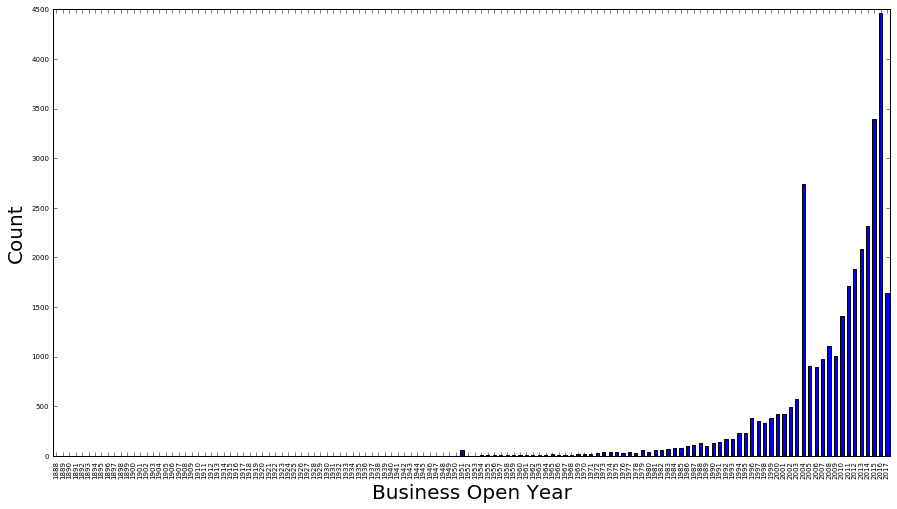

In [15]:
# Let's plot it.
%matplotlib inline  
ax = bl_resampled.plot.bar(figsize=(15,8), fontsize = 7, legend = False);
ax.set_xlabel('Business Open Year', fontsize = 20)
ax.set_ylabel('Count', fontsize = 20);

Whoa! Look at that jump in 2004! Is this due to the new business license requirement for lessors?   There should be only about 1000 new business licenses. Instead there are 3000! There's about 2000 extra business licenses for 2004. Let's take a deeper look at lessor business licenses.

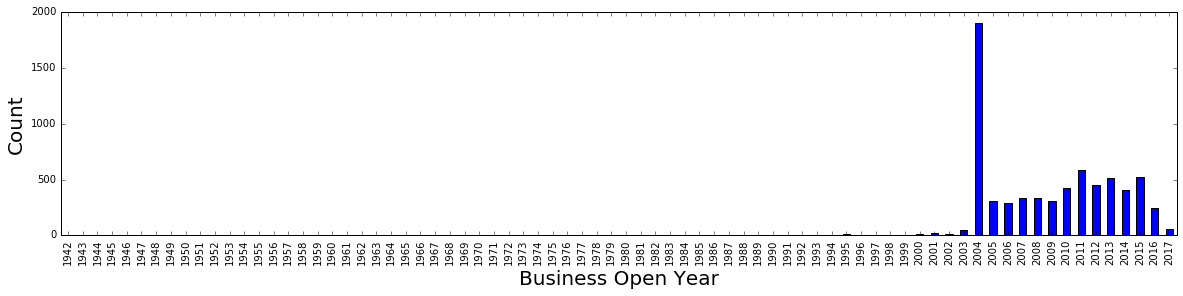

In [16]:
# Lessor business license grouped yearly
bl_lessor = bl[bl['NAICS CODE DESCRIPTION']=='Lessors of Residential Buildings and Dwellings']
bl_lessor = bl_lessor.resample('AS', on='BUSINESS OPEN DATE')['BUSINESS NAME'].count()
bl_lessor = pd.DataFrame(bl_lessor)
bl_lessor['BUSINESS OPEN DATE'] = bl_lessor.index.year
bl_lessor = bl_lessor.set_index('BUSINESS OPEN DATE')
bl_lessor=bl_lessor.rename(columns = {'BUSINESS NAME':'Count_Lessor'})
# Plot it.
ax = bl_lessor.plot.bar(figsize=(20,4), fontsize = 10, legend = False);
ax.set_xlabel('Business Open Year', fontsize = 20)
ax.set_ylabel('Count', fontsize = 20);

It looks like lessor business licenses *are* the cause of the overall jump in 2004. Interesting!

Let's also take a look at the taxi business. Did it experience a jump in the number of business licenses as well due to the new requirement in 2014?

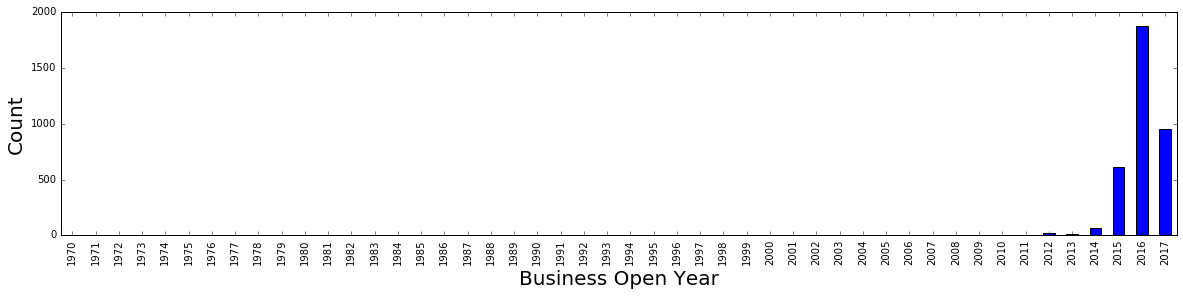

In [17]:
# Taxi business license grouped yearly
bl_lessor = bl[bl['NAICS CODE DESCRIPTION']=='Taxi Service']
bl_lessor = bl_lessor.resample('AS', on='BUSINESS OPEN DATE')['BUSINESS NAME'].count()
bl_lessor = pd.DataFrame(bl_lessor)
bl_lessor['BUSINESS OPEN DATE'] = bl_lessor.index.year
bl_lessor = bl_lessor.set_index('BUSINESS OPEN DATE')
bl_lessor=bl_lessor.rename(columns = {'BUSINESS NAME':'Count_Lessor'})
# Plot it.
ax = bl_lessor.plot.bar(figsize=(20,4), fontsize = 10, legend = False);
ax.set_xlabel('Business Open Year', fontsize = 20)
ax.set_ylabel('Count', fontsize = 20);

It does look like their is a jump in taxi business licenses. Nice! 

## Finding groups with similar features in the dataset using K-modes clustering

My previous analysis of lessors and taxi drivers gave me an idea to explore the data more using clustering. When looking at the plot showing the number of new business licenses every year I was led to investigate an underlying feature of the dataset -- the jump in licenses in 2004 for lessors. I wonder if there are other features of the dataset that I can pull out. One way of finding features is using a machine learning technique called *clustering* which sorts through each data point (in our case, each business license) and groups it with other similar data points. For example, business licenses with opening dates around 2004 in the leasing industry might  be grouped together.  

I'll be using a version of k-means clustering that allows for categorical data called [k-modes clustering](http://arbor.ee.ntu.edu.tw/~chyun/dmpaper/huanet98.pdf). The basic steps of k-means clustering using numerical data are as follows. 

* Randomly select the centers of the clusters.
* Find the distance between the centers and each data point.
* Assign each data point to the cluster center that is closest.
* Calculate the new center of the cluster using its cluster members.
* Repeat process until cluster center doesn't change a significant amount.

Another way to say this is that the k-means clustering algorithm minimizes the sum of the squared differences between the cluster members and cluster center.

Since the business license dataset contains a few columns containing categorical, rather than numerical data, I'll use a modified version of k-means clustering called k-modes clustering. Rather than minimizing the sum of the squared differences, this technique minimizes the *dissimilarity* measure which is defined as 

$ \Sigma_{\textrm{all }j}{\delta(x_j, y_j)}$

The dissimilarity measure is the sum over all of the categorical features $j$ in the dataset. Each business license is represented by $x$ and $y$. The function $\delta$ is the delta function, i.e., $\delta = 0$ when $x$ and $y$ are in the same category and $\delta = 1$ when they are in different categories. 

Another difference between the k-modes method and the k-means method is the use of the mode rather than the mean to find the center of the cluster.

A [python implementation of this technique](https://github.com/nicodv/kmodes) has been written. It also includes `k-prototypes` which allows for a mix of categorical and numerical data in a single data set. I'll be using that.

### Feature selection
Before plugging my dataset into the algorithm, let me choose the "features" to be used. Based on my previous experiments with the lessors and the most common businesses in each ZIP code, I think some useful features will be the opening year of the business, the NAICS code, and the ZIP code. However, rather than using the entire NAICS code, I'll only use the first two digits. These give the broad category of each business which is what I am interested in here. 

In [18]:
# Create new column which contains only first two digits of NAICS CODE.
bl['NAICS CODE FIRST TWO'] = bl['NAICS CODE'].fillna('00')
bl['NAICS CODE FIRST TWO'] = bl['NAICS CODE FIRST TWO'].astype(str)
bl['NAICS CODE FIRST TWO'] = bl['NAICS CODE FIRST TWO'].str[:2]

In [19]:
# Count up the number of licenses for each NAICS CODE 2 digit grouping.
bl_groupedbynaicsfirst2 = bl.groupby('NAICS CODE FIRST TWO')['BUSINESS NAME'].count()
sorted = bl_groupedbynaicsfirst2.sort_values()
sorted.tail(3)

NAICS CODE FIRST TWO
48    4062
23    4495
53    8544
Name: BUSINESS NAME, dtype: int64

If I only use the first two digits of the NAICS code, then the top business types are "Real Estate and Rental and Leasing," "Construction," and "Transportation and Warehousing."

In [20]:
# How many unique NAICS 2 digits codes are there in this dataset?
naics_keys = sorted.keys()
len(naics_keys)

25

In [21]:
# Create the dataset to be used in the k-modes clustering algorithm
# Create new column with open year.
bl['BUSINESS OPEN YEAR'] = bl['BUSINESS OPEN DATE'].dt.year
# Create a dataframe that contains the data to be used for clustering.
df_kmodes = bl[['NAICS CODE FIRST TWO', 'BUSINESS OPEN YEAR','ZIP CODE 5 string']].copy()
df_kmodes.head()

,NAICS CODE FIRST TWO,BUSINESS OPEN YEAR,ZIP CODE 5 string
0,54,1994,98004
1,61,2016,98406
2,53,2007,98466
3,45,2005,37402
4,56,2015,98335


In [22]:
df_kmodes.dtypes

NAICS CODE FIRST TWO    object
BUSINESS OPEN YEAR       int64
ZIP CODE 5 string       object
dtype: object

In [23]:
# Import kprototypes module from kmodes
# https://github.com/nicodv/kmodes
from kmodes import kprototypes
# Convert dataframe to numpy array.
X = pd.DataFrame.as_matrix(df_kmodes)
print X

[['54' 1994 '98004']
 ['61' 2016 '98406']
 ['53' 2007 '98466']
 ..., 
 ['71' 2009 '98405']
 ['53' 2004 '98109']
 ['23' 2001 '98370']]


A common question that is often asked when trying to cluster data is "How many clusters should I have?" Usually it's a good idea to plot the data to try to figure this out. This is a bit difficult to do when dealing with three features, but let's see what we find.

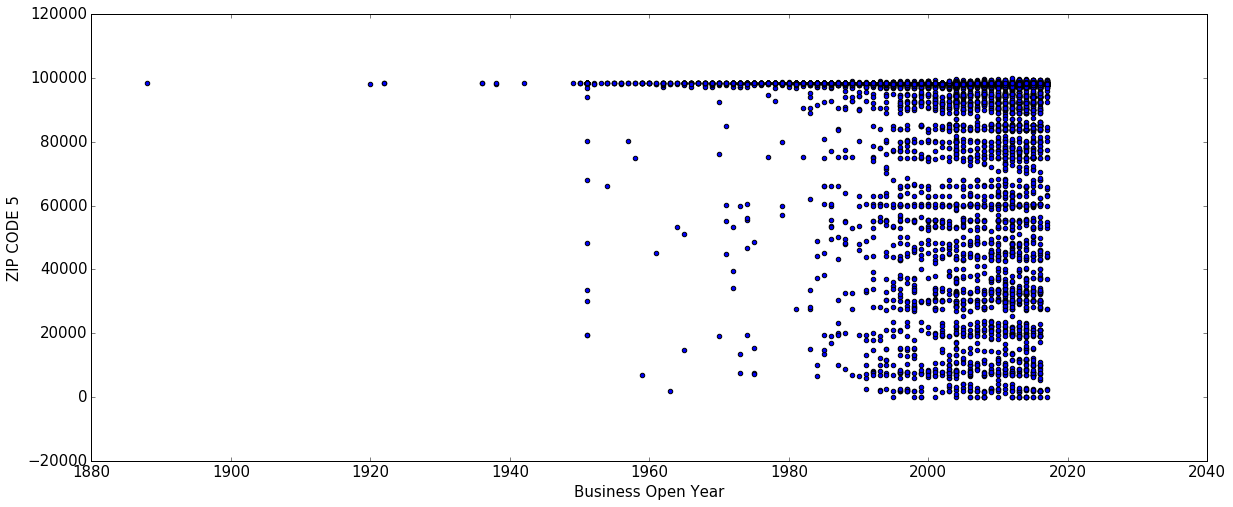

In [24]:
# ZIP code vs business open year
ax = bl.plot.scatter(x="BUSINESS OPEN YEAR", y = "ZIP CODE 5 int", figsize=(20,8), fontsize = 15, legend = False);
ax.set_xlabel('Business Open Year', fontsize = 15)
ax.set_ylabel('ZIP CODE 5', fontsize = 15);

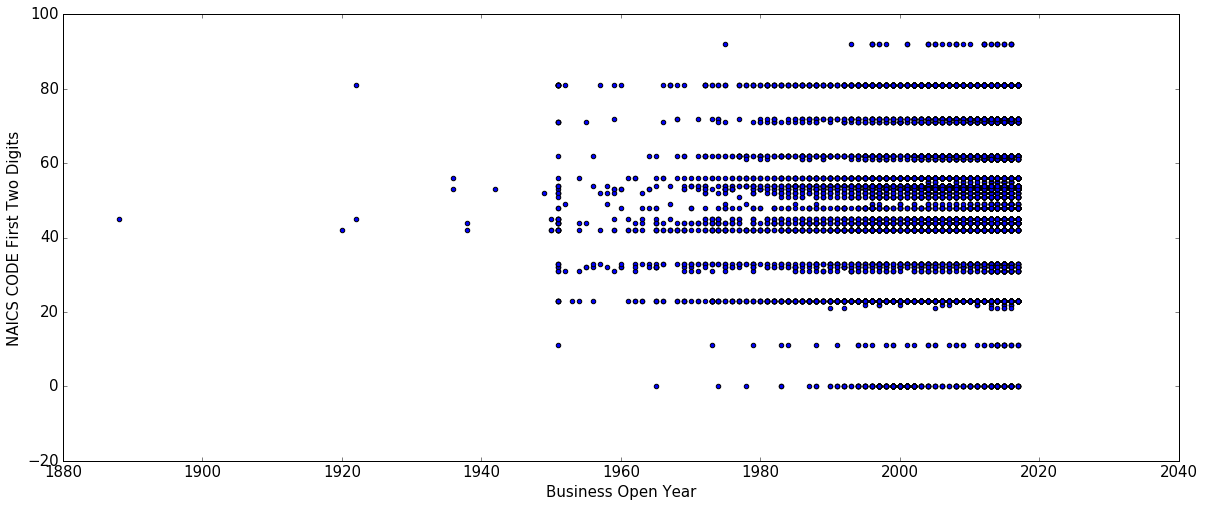

In [25]:
# First two digits of NAICS code vs business open year
bl['NAICS CODE FIRST TWO INT'] = bl['NAICS CODE FIRST TWO'].astype(int)
ax = bl.plot.scatter(x="BUSINESS OPEN YEAR", y = "NAICS CODE FIRST TWO INT", figsize=(20,8), fontsize = 15, legend = False);
ax.set_xlabel('Business Open Year', fontsize = 15)
ax.set_ylabel('NAICS CODE First Two Digits', fontsize = 15);

I'm not seeing any obvious groupings of the data. So, that wasn't really helpful in trying to figure out the number of clusters.  That's ok, there's another way. For the k-means algorithm, a common technique is to find the "elbow point." The first step is to run the k-means algorithm for a few different values of $k$ (the number of clusters). Then plot the average distance of each point to its cluster's center against the number of clusters. For only two clusters, the average distance will be large. But as the number of clusters increases, the average distance decreases until it bottoms out. The point where the curve goes from steep to flat is the "elbow point." More clusters the right of the the "elbow point" are likely to be subjected to overfitting. If the number of clusters equals the number of datapoints, then each point has its own cluster and that's not very useful.


Let's give the elbow method a try and see what happens. I'll try between 2 and 25 clusters. The maximum number of NAICS codes is 25. I think the clusters might start to be grouped by NAICS codes if I let there be that many. Let's see. Let's go!

In [26]:
# Create dictionaries to store the data from the k-modes algorithm.
cluster_dict = {}
kproto_dict = {}

WARNING!  The following loop takes awhile (> 1 hour) to run on my ~2010 Macbook Air. If you'd like to play with the data it creates, but would rather not run this loop yourself, then use the data that I have put in a [pickle file](https://wiki.python.org/moin/UsingPickle) for safe-keeping. I write to the pickle file after the loop runs. You should be able to find it [here](https://github.com/aurban8/aurban8.github.io/blob/dev/content/notebooks/cluster_data.p) as well.

In [27]:
for i in range(2,26):
    kproto_dict[i] = kprototypes.KPrototypes(n_clusters = i, init = 'Cao', verbose = 0) 
    cluster_dict[i]= kproto_dict[i].fit_predict(X, categorical=[0,2])

In [28]:
# Create dictionary with cluster data. 
cluster_info = {}
for i in range(2,26):
    cluster_info[i]=[kproto_dict[i].cost_,
                     kproto_dict[i].n_iter_, 
                     kproto_dict[i].cluster_centroids_,
                     cluster_dict[i]]

In [ ]:
# Save data in a pickle file.
import pickle   
pickle.dump(cluster_info,open('cluster_data.p', 'wb'))

In [29]:
# To use the data in the pickle file, read it in here.
import pickle   
cluster_info = pickle.load(open('cluster_data.p', 'rb'))

Now that I have the data compiled for a range of `k` values, I can compare how the error (or "Cost") changes with `k`.

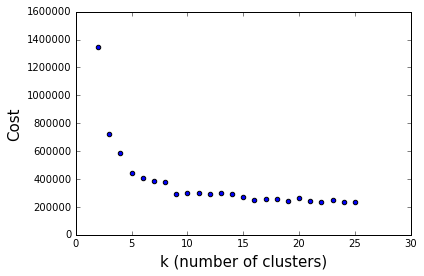

In [30]:
x = cluster_info.keys()
cost = {}
for k in cluster_info:
    cost[k] = cluster_info[k][0]
y = cost.values()
plt.xlabel('k (number of clusters)', fontsize = 15)
plt.ylabel('Cost', fontsize = 15)
plt.scatter(x,y);

It looks like the 'elbow' occurs around 10 and since 10 is a nice round number, I'll use that for my number of clusters. The next step is to see what I can learn about how the data is organized into these 10 clusters. What are the primary features of each cluster? One way of investigating this is by looking at the cluster centroids.

In [31]:
# Print cluster ID and cluster centroid: year, NAICS ID, and ZIP code
year = cluster_info[10][2][0]
IDZIP = cluster_info[10][2][1]
print 'Year NAICS  ZIP'
for i in range(len(year)):
    print int(year[i][0]), IDZIP[i][0], '   ', IDZIP[i][1]

Year NAICS  ZIP
2005 53     98409
1959 42     98409
1981 23     98409
1999 00     98409
2011 53     98409
2003 53     98406
1992 23     98409
2008 53     98405
2014 53     98408
2016 48     98409


In [32]:
# The fact that the ZIP code 98409 is the 'center' of most of the clusters 
# makes sense because it is the most common ZIP code in the data set.
bl_groupedbyZIP = bl.groupby('ZIP CODE')['BUSINESS NAME'].count()
sorted = bl_groupedbyZIP.sort_values()
sorted.tail(5)

ZIP CODE
98407     376
98406     530
98405     604
98402     921
98409    1102
Name: BUSINESS NAME, dtype: int64

Another way of understanding the clusters is by visualizing them.


In [33]:
# Assign each business in the dataframe to a cluster.
bl['cluster_num'] = cluster_info[10][3]

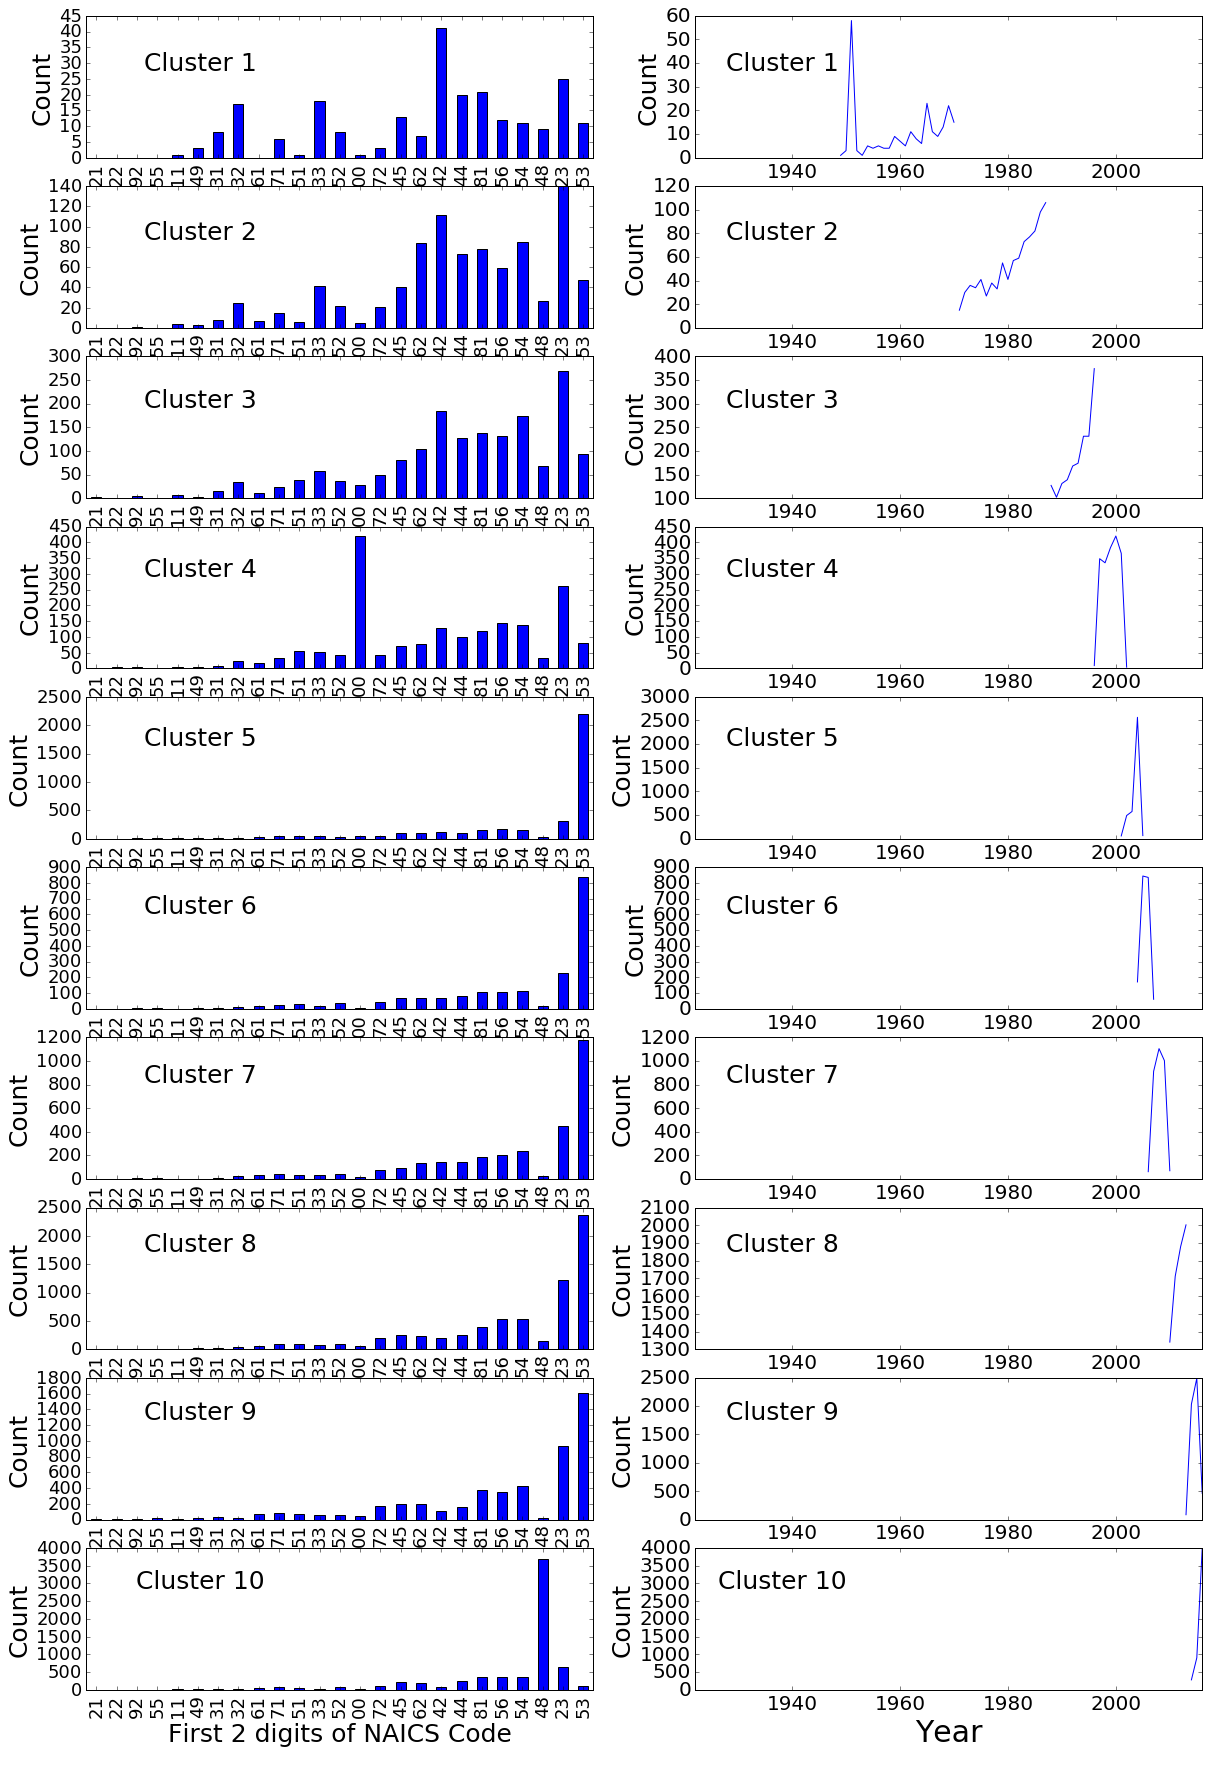

In [34]:
xaxisorderkeys = naics_keys
xaxisorderyears = range(1922,2017)

plt.figure(figsize = (20,30))  #w,h
numplots = 10
# Clusters arranged in approximate chronological order.
plot_order = [1,2,6,3,5,0,7,4,8,9]  
for i in range(numplots):
    clustername = 'Cluster ' + str(i+1)
#    clustername = 'Cluster' + str(plot_order[i]+1)
    current_cluster = bl[bl['cluster_num']==plot_order[i]]
    plt.subplot(numplots, 2, (i+1*i)+1)
    current_cluster['NAICS CODE FIRST TWO'].value_counts().reindex(xaxisorderkeys).plot(
        kind='bar', fontsize = 18)
    plt.ylabel('Count', fontsize = 25)
    plt.xlabel('First 2 digits of NAICS Code', fontsize = 25)
    plt.text(0.00,3.3-0.34*i,clustername, horizontalalignment='center', 
             verticalalignment='center',transform=ax.transAxes, fontsize = 25)

    plt.subplot(numplots, 2, (i+1*i)+2)
    current_cluster['BUSINESS OPEN YEAR'].value_counts().reindex(xaxisorderyears).plot(
        kind='line', fontsize = 20)
    plt.ylabel('Count', fontsize = 25)
    plt.xlabel('Year', fontsize = 30)
    plt.text(0.47,3.3-0.34*i,clustername, horizontalalignment='center', 
             verticalalignment='center',transform=ax.transAxes, fontsize = 25)

I've arranged the clusters so that they are in chronologicial order. Clusters 1, 2, and 3 appear to have the same NAICS Code distribution. I could see that these clusters might be better placed into one single cluster with a range of years from about 1950-1980. Cluster 4 is a bit odd because it has a peak for NAICS codes of 00 which are originally NaN values. I'm not sure what might have caused the big spike in business owners suddenly not knowing how to classify their businesses. Or maybe a previously defined NAICS code was retired and is no longer valid anymore and was replaced by NaN.  Or maybe, *whispering in my best conspiracy voice* it's related to the [Y2K bug](https://en.wikipedia.org/wiki/Year_2000_problem) because it's happened around the year 2000. *back to normal voice*

CLusters 5-9 are similar to each other; they all have big peaks in for NAICS code 53, the code where lessors file. The main difference here is the ratio between the peak for code 53 and all the other codes is decreasing. I can't tell if this is real or just an artifact of the large influx of lessor business licenses in 2004. It might be interesting to do this same analysis without the lessor business licenses included.

Finally, Cluster 10 shows the spike in taxi business licenses due to the introduction of ride-share businesses. 